<a href="https://colab.research.google.com/github/vmesa05/BME3053C/blob/main/lessons-solved/04_Pandas_09.29.2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BME3053C - Computer Applications for BME

<br/>

<h1 align="center">Pandas</h1>

---

<center><h2>Lesson 04</h2></center>

<br/>

<center><img src='https://github.com/snsie/aicc24/blob/main/graphics/pandas_logo.png?raw=1' alt='The Pandas logo' align='center' width=200></center>

<br/>

### Original Lesson Link: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/uf-bme/BME3053C-Fall-2025/blob/main/lessons/04_Pandas.ipynb)


Pandas is built on top of the **NumPy** library, which in practice means that most of the methods defined for NumPy Arrays apply to *pandas* Series/DataFrames.

### **What makes Pandas so attractive?**
1. Powerful and efficient interface to access and manipulate individual records.
2. Proper handling of missing values.
3. Relational database-style operations between DataFrames.

#Importing [Pandas](https://pandas.pydata.org/docs/user_guide/index.html)

* Pandas is commonly imported as shown below:

```
import pandas as pd
```

In [1]:
#import pandas below
import pandas as pd

# Creating a [Series](https://pandas.pydata.org/docs/reference/series.html)
* **1D Data Structure:** A Pandas Series is a one-dimensional labeled array that can hold any data type (integers, floats, strings, etc.). It is similar to a column in a DataFrame or a single column in a table.

* **Indexing:** Each element in a Series has a corresponding label (index), making data retrieval easy and fast. By default, the index is numeric, but you can assign custom labels.

* **Missing Data Handling:** Series natively handles missing or NaN (Not a Number) values, which is common in real-world data. Pandas offers various functions to handle or fill these missing values effectively.


In [2]:
spo2 = [88, 99, 88, 85, 100, 98]
risk = ['high', 'low', 'high', 'high', 'low', 'low']

# Creating a series
spo2_series = pd.Series(spo2)
risk_series = pd.Series(risk)
print(risk_series)

0    high
1     low
2    high
3    high
4     low
5     low
dtype: object


##Mathematical Operations

* **Element-wise Addition:** You can add two Series together, and the operation will be performed element by element, based on the index (e.g., series1 + series2).

* **Element-wise Subtraction:** Similarly, you can subtract one Series from another (e.g., series1 - series2).

* **Scalar Operations:** You can perform operations between a Series and a scalar value, such as adding a constant to each element (e.g., series + 5) or multiplying all elements by a constant (e.g., series * 10).

* **Cumulative Operations:** Pandas supports cumulative operations like cumulative sum (series.cumsum()), cumulative product (series.cumprod()), or cumulative minimum/maximum (series.cummin(), series.cummax()).

* **Statistical Functions:** You can apply statistical functions like mean (series.mean()), median (series.median()), standard deviation ([`series.std()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html)), or sum [`series.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html) directly to a Series.

# Pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

* One of the most useful data structures for managing data in Python
* Allow fast, flexible, and efficient data manipulation
* Are the natural data structure for **tabular** data
* Are two-dimensional, containing both **rows** and **columns**
* Consist of one or more **Series**


Let's create a small DataFrame from our very basic sample data.

In [3]:
df = pd.DataFrame({'spo2': spo2, 'risk': risk}) # Create the DataFrame
df # View the DataFrame

,spo2,risk
0,88,high
1,99,low
2,88,high
3,85,high
4,100,low
5,98,low


Creating a larger DataFrame using random integers generated using numpy data.

* When viewing a large DataFrame in a Jupyter notebook, sometimes the data will be truncated as above.

In [4]:
import numpy as np

random_data = np.random.randint(1,10, size=2000).reshape(500, 4)

#example column names
column_names = ['columnA', 'columnB', 'columnC', 'columnD']

# Create the DataFrame from the random data we generated.
# Since the input matrix has 500 rows and 4 columns, the DataFrame will have 500 rows and 4 columns
df = pd.DataFrame(data=random_data, columns=column_names)
df # View the dataframe

,columnA,columnB,columnC,columnD
0,8,3,6,5
1,7,5,9,1
2,3,2,9,4
3,2,4,3,9
4,4,9,6,9
...,...,...,...,...
495,8,4,7,8
496,5,2,2,1
497,4,2,1,9
498,4,2,3,4


> **📌 Note:** When viewing a large DataFrame in a Jupyter notebook, sometimes the data will be truncated as above.

### Reading Excel Data

* Instead of creating a DataFrame from scratch, data is usually loaded from an existing data file. The most common file format for storing datasets is the **comma-separated value** `(.csv)` file.
  * The [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) can be used for this task.  
  * The `filepath_or_buffer` argument can be a local filename, or a remote URL of a file stored on the web.



The cell below loads sample patient electronic health record (EHR) data.

In [5]:
url='https://www.dropbox.com/scl/fi/6oalhztas5ox5zcna9ois/temperature.csv?rlkey=zwf8f80dqa92dep1rm8kjnx9m&dl=1'
temps_df = pd.read_csv(url) # Create the DataFrame from the given URL
temps_df # View the DataFrame we just created

,patient_id,time,temp_source,temp_value,temp_unit
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit
1,2,1965-02-16 12:34:29,Oral,96.7,Farenheit
2,2,1999-09-28 01:35:52,Tympanic,98.2,Farenheit
3,2,2071-02-23 10:36:34,Temporal,96.5,Farenheit
4,3,1988-05-10 01:38:51,Oral,97.2,Farenheit
...,...,...,...,...,...
1995,998,1985-05-14 00:14:54,Tympanic,95.5,Farenheit
1996,998,2036-03-15 06:59:01,Oral,97.7,Farenheit
1997,998,2074-03-17 21:21:09,Oral,98.1,Farenheit
1998,999,2017-02-03 01:23:52,Oral,97.4,Farenheit


from matplotlib import pyplot as plt
temps_df['patient_id'].plot(kind='hist', bins=20, title='patient_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temps_df['temp_value'].plot(kind='hist', bins=20, title='temp_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
temps_df.plot(kind='scatter', x='patient_id', y='temp_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient_id']
  ys = series['temp_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temps_df.sort_values('patient_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient_id')
_ = plt.ylabel('temp_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['patient_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'patient_id'}, axis=1)
              .sort_values('patient_id', ascending=True))
  xs = counted['patient_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temps_df.sort_values('patient_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['temp_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temps_df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('temp_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'time'}, axis=1)
              .sort_values('time', ascending=True))
  xs = counted['time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temps_df.sort_values('time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
temps_df['patient_id'].plot(kind='line', figsize=(8, 4), title='patient_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
temps_df['temp_value'].plot(kind='line', figsize=(8, 4), title='temp_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['patient_id'].plot(kind='hist', bins=20, title='patient_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['temp_value'].plot(kind='hist', bins=20, title='temp_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='patient_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='patient_id', y='temp_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['temp_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('temp_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['patient_id']
  ys = series['temp_value']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('patient_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient_id')
_ = plt.ylabel('temp_value')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['patient_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'patient_id'}, axis=1)
              .sort_values('patient_id', ascending=True))
  xs = counted['patient_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('patient_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('patient_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['patient_id'].plot(kind='line', figsize=(8, 4), title='patient_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['temp_value'].plot(kind='line', figsize=(8, 4), title='temp_value')
plt.gca().spines[['top', 'right']].set_visible(False)

We can see that this dataset contains 2000 rows and 5 columns corresponding to patient temperature measurements from an EHR system.   

Below is a more detailed description of each column:

| Column |  Description |
| --- | --- |
|  patient |   unique patient identifier |
|  time |   the date and time of temperature measurement |
|  temp_source |   the temperature acquisition method |
|  temp_value |   the measured temperature value |
|  temp_unit |   the temperature measurement unit |

# Viewing Parts of a Dataframe
* DataFrames often hold a large number of rows (in many AI projects, you might be dealing with hundreds of thousands, or even millions, of samples)
* Sometimes we just want to get a preview, or a sense of what data is being stored in our DataFrame.

Let's start by viewing only some of a DataFrame's **rows**. Since pandas is so flexible, there are several ways to accomplish this. In the examples below, we will use the pandas functions `head()` and `tail()`.

#### **✏️ Exercise**
1. Use the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) function to view the first 10 rows of our DataFrame.

In [6]:
temps_df.head(10)

,patient_id,time,temp_source,temp_value,temp_unit
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit
1,2,1965-02-16 12:34:29,Oral,96.7,Farenheit
2,2,1999-09-28 01:35:52,Tympanic,98.2,Farenheit
3,2,2071-02-23 10:36:34,Temporal,96.5,Farenheit
4,3,1988-05-10 01:38:51,Oral,97.2,Farenheit
5,3,1994-01-08 22:40:37,Temporal,96.5,Farenheit
6,3,1994-05-21 05:32:02,Temporal,94.9,Farenheit
7,3,2006-12-13 22:16:48,Oral,97.3,Farenheit
8,3,2086-04-26 13:47:46,Core,94.8,Farenheit
9,4,1940-06-24 03:40:22,Oral,97.4,Farenheit


#### **✏️ Exercise**
1. Use `tail()` to view the **last** 10 rows of our DataFrame.


In [7]:
temps_df.tail(10)

,patient_id,time,temp_source,temp_value,temp_unit
1990,996,2012-03-07 07:53:56,Oral,97.3,Farenheit
1991,996,2045-03-07 16:23:28,Oral,96.1,Farenheit
1992,996,2066-12-03 15:45:37,Temporal,97.3,Farenheit
1993,997,2025-02-22 01:08:59,Oral,98.8,Farenheit
1994,997,2068-04-27 08:21:43,Oral,96.0,Farenheit
1995,998,1985-05-14 00:14:54,Tympanic,95.5,Farenheit
1996,998,2036-03-15 06:59:01,Oral,97.7,Farenheit
1997,998,2074-03-17 21:21:09,Oral,98.1,Farenheit
1998,999,2017-02-03 01:23:52,Oral,97.4,Farenheit
1999,999,2039-01-21 02:31:01,Temporal,98.7,Farenheit


##Displaying a list of columns

* You can display a list of columns by calling `temps_df.columns`

In [ ]:
print(temps_df.columns)

Index(['patient_id', 'time', 'temp_source', 'temp_value', 'temp_unit'], dtype='object')


## Viewing individual columns

* For a given DataFrame `df` and desired column `col`, one way to view a single column is to call `df['col']`.
  * The column name `col` must be in quotes.



#### **✏️ Exercise**
1. Use the above method to view the `temp_value` column of our DataFrame.

In [9]:
temps_df['temp_value']

,temp_value
0,97.3
1,96.7
2,98.2
3,96.5
4,97.2
...,...
1995,95.5
1996,97.7
1997,98.1
1998,97.4


In [11]:
temps_df['temp_source']
#can also be written as temps_df.temp_source

,temp_source
0,Core
1,Oral
2,Tympanic
3,Temporal
4,Oral
...,...
1995,Tympanic
1996,Oral
1997,Oral
1998,Oral


We can also adapt this method to view multiple columns. Instead of passing in a single string column name `'C'`, instead we will pass in a **list** of string column names, e.g. `['A', 'B', 'C']`. For example: `df[['A', 'B', 'C']]` (**Important:** Notice the double brackets!)

#### **✏️ Exercise**

1. Use the above method to view the `temp_value` **and** `temp_unit` columns of our DataFrame.

In [15]:
temps_df[['temp_value','temp_unit']]


###Another way to do it:

partial_df=temps_df[['temp_value','temp_unit']]
print('temps_df')
print(temps_df.head())
print('partial_df')
print(partial_df.head())


temps_df
   patient_id                 time temp_source  temp_value  temp_unit
0           1  1984-06-18 17:58:02        Core        97.3  Farenheit
1           2  1965-02-16 12:34:29        Oral        96.7  Farenheit
2           2  1999-09-28 01:35:52    Tympanic        98.2  Farenheit
3           2  2071-02-23 10:36:34    Temporal        96.5  Farenheit
4           3  1988-05-10 01:38:51        Oral        97.2  Farenheit
partial_df
   temp_value  temp_unit
0        97.3  Farenheit
1        96.7  Farenheit
2        98.2  Farenheit
3        96.5  Farenheit
4        97.2  Farenheit


#### **✏️Exercise**

1. Display the top two rows of a dataframe that only includes the `time` and `temp_value` columns.

In [16]:
temps_df[['time','temp_value']].head(2)

,time,temp_value
0,1984-06-18 17:58:02,97.3
1,1965-02-16 12:34:29,96.7


# Creating new columns

* You can create new columns in an existing DataFrame. When we define an equation as below, equation will be applied to every **row** of the DataFrame. In this way, we can create new columns from different combinations of existing columns.

1. The following cell converts Fahrenheit temperature to Celsius and assigns the values to a new column called `temp_celsius`.

In [17]:
temps_df['temp_celsius'] = (temps_df['temp_value'] - 32) * (5/9)
temps_df.head()

,patient_id,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit,36.277778
1,2,1965-02-16 12:34:29,Oral,96.7,Farenheit,35.944444
2,2,1999-09-28 01:35:52,Tympanic,98.2,Farenheit,36.777778
3,2,2071-02-23 10:36:34,Temporal,96.5,Farenheit,35.833333
4,3,1988-05-10 01:38:51,Oral,97.2,Farenheit,36.222222


# Deleting columns

We can also *delete* (also known as **drop**) columns.

Let's remove the `temp_celsius` column that we previously created.

In [21]:
temps_df.drop(columns=['temp_celsius']) # Will this remove the column?
temps_df.head()

#No

,patient_id,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit,36.277778
1,2,1965-02-16 12:34:29,Oral,96.7,Farenheit,35.944444
2,2,1999-09-28 01:35:52,Tympanic,98.2,Farenheit,36.777778
3,2,2071-02-23 10:36:34,Temporal,96.5,Farenheit,35.833333
4,3,1988-05-10 01:38:51,Oral,97.2,Farenheit,36.222222


### **What happened?**

* Unless you specify `inplace=True` or assign the dataframe back to itself (or a different variable name), **the `drop()` function does not change the original DataFrame!**

* The safest approach to remove a column is to create a new DataFrame.

In [22]:
temps_no_celsius_df = temps_df.drop(columns=['temp_celsius']) # Will this remove the column? Yes
temps_no_celsius_df.head()

,patient_id,time,temp_source,temp_value,temp_unit
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit
1,2,1965-02-16 12:34:29,Oral,96.7,Farenheit
2,2,1999-09-28 01:35:52,Tympanic,98.2,Farenheit
3,2,2071-02-23 10:36:34,Temporal,96.5,Farenheit
4,3,1988-05-10 01:38:51,Oral,97.2,Farenheit


# Descriptive Statistics With DataFrames

> Before diving into an AI project, it is critical to become familiar with the data you will be modeling!  Pandas has a large collection of optimized methods designed to analyze your data.

A preliminary data discovery and exploration phase can help you better understand the data you will be modeling, and has many downstream advantages:
* You may identify potential problems with the dataset (e.g., missing values, outliers, incomplete columns, irrelevant information)
* Results of data exploration may help you decide which preproessing or modeling approach to take.
* A better understanding of your population will help you interpret your future results.

## Remember Python functions?
Pandas offers many **functions** that take as **input** a set of values (example: all of the values from the `temp_celsius` column), and **return** a calculated **output** value based on which function was used.

Common examples:
* [`sum`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html#pandas-dataframe-sum) (sum the input values)
* [`count`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html#pandas-dataframe-count) (count the number of input values), `value_counts` (count the number of each unique value)
* [`min`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html#pandas-dataframe-min) (return the minimum value), `max` (return the maximum value)
* [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html#pandas-dataframe-mean) (return the mean value), `median` (median), `mode` (mode)
* [`var`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.var.html#pandas-dataframe-var) (variance), `std` (standard deviation)
* [`quantile`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html#pandas-dataframe-quantile) (compute quantiles)



Let's take a look at a few examples using our clinical dataset.

First, let's compute the **mean** patient temperature, measured in Fahrenheit (i.e., the `temp_value` of our DataFrame).

In [23]:
# Compute the mean temperature (Fahrenheit)
temps_df['temp_value'].mean()

np.float64(97.44479999999999)

#### **✏️ Exercise**

1. Compute the **minimum** Fahrenheit temperature (`temp_value`).

In [24]:
temps_df.temp_value.min()

89.5

#### **✏️Exercise**

1. Create a new column (`temp_norm`) that is equal to the normalized `temp_value` column.

$$x_{Normalized} = \frac{x_{val}-x_{min}}{x_{max}−x_{min}}$$



#### **✏️Exercise**

1. Count the number of occurrences of **each unique** temperature acquisition method (excluding missing values).

* **Hint #1:** The `temp_source` column contains the temperature acquisition method.

* **Hint #2:** The `value_counts()` function can be used to calculate counts of each unique value (excluding missing values).

The [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) function can be used on an entire DataFrame to display several common statistics (by default computed for every column), all at once.

> **📌 Note:** In general, it's important to be aware of the values and data types contained in each column, as sometimes the statistics will not make sense. For example, `patient` is a randomized patient identifier, so numerical calculations with these values will be meaningless.

In [ ]:
# (Almost) everything, (almost) everywhere, all at once
# Note: this code will only compute statistics for columns with numerical data.
temps_df.describe()

,patient_id,temp_value,temp_celsius
count,2000.000000,2000.000000,2000.000000
mean,499.017000,97.444800,36.358222
std,289.878512,1.376775,0.764875
min,1.000000,89.500000,31.944444
25%,250.000000,96.600000,35.888889
50%,510.500000,97.400000,36.333333
75%,747.250000,98.300000,36.833333
max,999.000000,103.300000,39.611111


# Filtering data with conditionals
Pandas makes it easy to select, analyze, and process subsets of your data based on some condition `C`. This is accomplished with easily understandable syntax: `df[C]` will return a subset of DataFrame `df` that **matches** the condition `C` listed inside brackets `[]`.

* we can create filtering criteria using familiar mathematical operators that were used in Python conditionals.

* **Helpful Tip:** `.isin(L)`: is equal to any value contained in the list `L`.

Let's display all recorded measurements where the patient's temperature was **greater** than 102$^{\circ} F$.
* In this example, the criteria `C` is `df['temp_value'] > 102`.
* Recall the Pandas filtering syntax: `df[C]`.
* So, this is what we want: `df[df['temp_value'] > 102]`.

In [ ]:
# Select rows where Fahrenheit temperature is greater than 102 degrees.
temps_df[temps_df['temp_value'] > 102]

,patient_id,time,temp_source,temp_value,temp_unit,temp_celsius
728,361,1989-09-09 04:01:52,Oral,102.7,Farenheit,39.277778
735,365,1988-08-03 02:09:43,Temporal,103.3,Farenheit,39.611111
848,431,2028-01-07 18:34:20,Oral,102.2,Farenheit,39.000000
1154,586,1961-07-19 05:24:34,Oral,102.6,Farenheit,39.222222
1176,593,2008-09-04 19:38:22,Tympanic,103.1,Farenheit,39.500000


#### **✏️ Exercise**

1. Display readings where temperature is less than 94$^{\circ} F$.

Now, let's write code to display the first `5` measurements where the temperature acquisition method (`temp_source`) is `Core`.

* Recall that the symbol `==` will check for equality (we want the source to be equal to the single value `Core`).
* In this example, the criteria `C` is `df['temp_value'] == 'Core'`.
* Given the Pandas filtering syntax: `df[C]`, this is what we want: `df[df['temp_source'] == 'Core']`.

In [ ]:
# Show the first 5 core temperature measurements.
temps_df[temps_df['temp_source'] == 'Core'].head()

,patient_id,time,temp_source,temp_value,temp_unit,temp_celsius
0,1,1984-06-18 17:58:02,Core,97.3,Farenheit,36.277778
8,3,2086-04-26 13:47:46,Core,94.8,Farenheit,34.888889
11,5,1932-01-22 15:41:18,Core,99.0,Farenheit,37.222222
18,9,1993-07-29 22:59:22,Core,97.3,Farenheit,36.277778
25,12,1972-10-22 12:13:21,Core,94.8,Farenheit,34.888889


#### **✏️ Exercise:**

1. Display the first `5` readings where the temperature acquisition method (`temp_source`) is `Tympanic`.

# Combining multiple filtering criteria

Multiple criteria can be combined using either the `&` or `|` symbols:
* C1 `&` C2: This will select rows that match **both** criteria C1 **and** C2.
* C1 `&` C2: This will select rows that match **either** criteria C1 **or** C2.

Let's see how we can display all measurements where the patient's temperature was between 99$^{\circ} F$ and 100$^{\circ} F$.

In this example, we have two criteria:
* C1: `temps_df['temp_value'] >= 99`
* C2: `temps_df['temp_value'] <= 100`

In [ ]:
# Select rows where the Fahrenheit temperature is between 99 and 100 degrees.
temps_df[(temps_df['temp_value'] >= 99) & (temps_df['temp_value'] <= 100)]

,patient_id,time,temp_source,temp_value,temp_unit
11,5,1932-01-22 15:41:18,Core,99.0,Farenheit
38,19,2059-04-21 09:56:06,Core,99.0,Farenheit
63,27,1996-12-11 22:18:43,Oral,99.9,Farenheit
85,36,2004-10-13 23:54:59,Core,99.7,Farenheit
89,37,2004-02-05 05:18:02,Core,99.4,Farenheit
...,...,...,...,...,...
1938,965,2068-03-14 16:38:39,Oral,99.7,Farenheit
1960,977,2014-07-10 02:40:05,PA catheter probe,99.1,Farenheit
1968,984,2037-06-10 05:39:30,Temporal,100.0,Farenheit
1973,986,1972-08-22 21:08:46,Tympanic,99.0,Farenheit


#### **✏️ Exercise:**

1. Display all `Core` temperatures that are greater than `100`$^{\circ} F$.

* **Hint:** we have 2 criteria.

# Analyzing filtered data
We can also apply the previous methods for computing descriptive statistics on a filtered data subset. Let's take a look at the distribution and other key statistics of all `Core` temperature measurements that were greater than `100`$^{\circ} F$.

In [ ]:
temps_df[(temps_df['temp_source'] == 'Core') & (temps_df['temp_value'] > 100)].describe()

,patient_id,temp_value,temp_celsius
count,9.000000,9.000000,9.000000
mean,349.333333,100.933333,38.296296
std,319.711198,0.561249,0.311805
min,12.000000,100.200000,37.888889
25%,88.000000,100.600000,38.111111
50%,316.000000,100.900000,38.277778
75%,591.000000,101.300000,38.500000
max,894.000000,101.700000,38.722222


# Data visualization
Pandas relies on the Matplotlib library to provide easy visualization of DataFrames.

Let's start by importing a new dataset.

In [ ]:
patient_df = pd.read_csv('https://www.dropbox.com/scl/fi/itlhhnrhbg9y9b3nnbd7t/data_unprocessed.csv?rlkey=labucmpbah1xu7alhmgrn4511&dl=1')
patient_df.head()

,patient_id,sex,ethnicity,race,language,marital_status,age,bmi,admission_source,emergent,...,valve,coag,obese,wghtloss,lytes,anemia,alc_drug,depress,egfr,aki
0,0,MALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,62.4614,24.6711,NON-TRANSFER,EMERGENCY,...,0,0,1,0,0,0,0,1,82.1529,0
1,1,MALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,65.3903,30.5554,TRANSFER,NON-EMERGENCY,...,0,0,0,1,0,1,0,0,104.7827,1
2,2,FEMALE,NON-HISPANIC,WHITE,ENGLISH,SINGLE,82.6667,40.5842,NON-TRANSFER,NON-EMERGENCY,...,0,0,1,0,0,1,0,0,85.4759,0
3,3,MALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,62.1461,22.5506,NON-TRANSFER,EMERGENCY,...,0,1,1,0,1,0,1,0,57.2850,0
4,4,FEMALE,NON-HISPANIC,WHITE,ENGLISH,MARRIED,43.1582,16.7270,NON-TRANSFER,EMERGENCY,...,0,0,0,0,1,0,1,0,NaN,1


First, let's visually examine the distribution of patient age with the pandas [`hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) function, which computes a simple histogram.

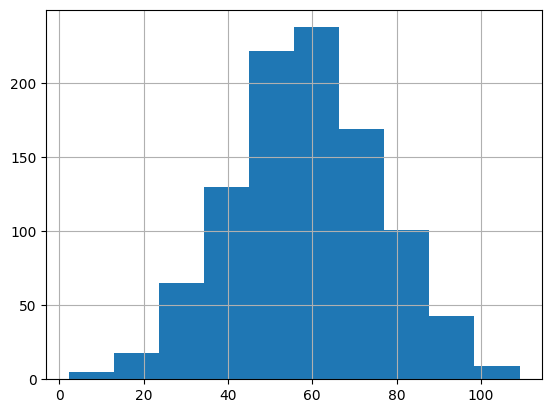

In [ ]:
hist = patient_df['age'].hist()

We can modify many parameters of the `hist()` function to create a more informative figure.

<Axes: title={'center': 'Distribution of Patient Age'}, xlabel='Age', ylabel='Count'>

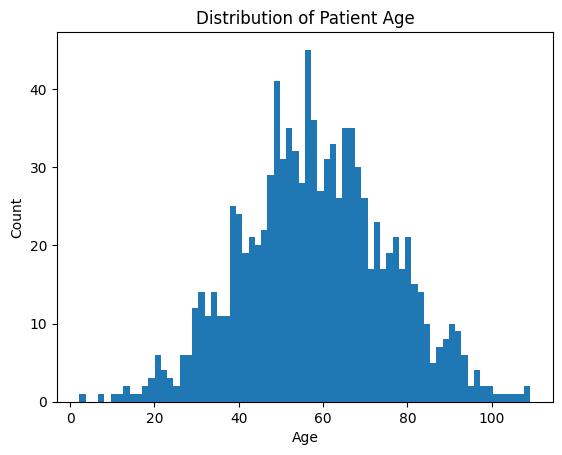

In [ ]:
hist = patient_df['age'].hist(bins=72, grid=False)
hist.set_title('Distribution of Patient Age')
hist.set_ylabel('Count')
hist.set_xlabel('Age')
display(hist)

#### **✏️ Exercise**

1. Visualize the distribution of the body mass index (`bmi`) column. Feel free to first filter out unrealistic BMI values and to experiment with the `bins` parameter of the `hist()` function.

For continuous variables, we can quickly create box plots (and effortlessly group by categorical groups) from DataFrame columns using the [`df.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html#pandas.DataFrame.plot.box) function.

age    Axes(0.125,0.11;0.775x0.77)
dtype: object

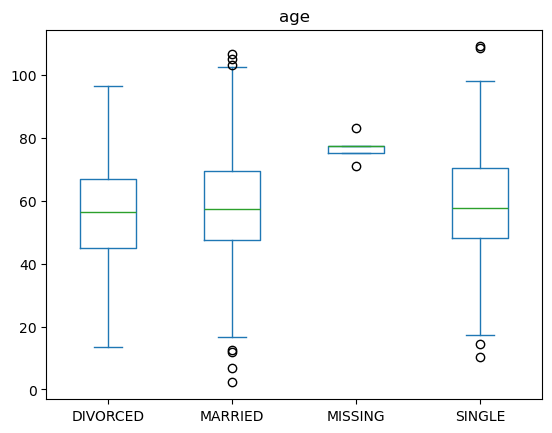

In [ ]:
patient_df.plot.box(column='age', by='marital_status')

#### **✏️ Exercise**
1. Practice with the `hist()` and `box()` functions by exploring different columns in our DataFrame. Experiment with data filtering methods to further refine your figures.

* **Hint:** Don't forget you can display a list of a DataFrame `df`'s columns with the command `print(df.columns)`.